In [687]:
import numpy as np # linear algebra
import pandas as pd 


#Visualizations library
import seaborn as sns 
import matplotlib.pyplot as plt
import graphviz 


#Stats library
from scipy import stats
from scipy.stats import norm, skew 

#Preprocessing Libraries
from sklearn.utils import shuffle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale
from scipy.special import boxcox1p
from functools import reduce
from sklearn.decomposition import PCA

# Modelling Librries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LassoCV, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import Pool, CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Model selection and evaluation
from sklearn.model_selection import KFold, cross_val_score, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support


import os
import time
import datetime
from IPython.display import HTML, display, clear_output
import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [688]:
data = pd.read_excel('Potential datasets for recruitment.xlsx', sheet_name='Dataset 2')

In [689]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN
5,1017122,8,10,10,8,7,10,9,7,1,4,NaN
6,1018099,1,1,1,1,2,10,3,1,1,2,NaN
7,1018561,2,1,2,1,2,1,3,1,1,2,NaN
8,1033078,2,1,1,1,2,1,1,1,5,2,NaN
9,1033078,4,2,1,1,2,1,2,1,1,2,NaN


In [690]:
print("Dataset Shape:")
print(data.shape)
print("\n")
print("Dataset Columns\t\t    Features:")
print(data.dtypes)
data.head()

Dataset Shape:
(699, 12)


Dataset Columns		    Features:
Sample code number                           int64
Clump Thickness                              int64
Uniformity of Cell Size                      int64
Uniformity of Cell Shape                     int64
Marginal Adhesion                            int64
Single Epithelial Cell Size                  int64
Bare Nuclei                                 object
Bland Chromatin                              int64
Normal Nucleoli                              int64
Mitoses                                      int64
Class: (2 for benign,  4 for malignant)      int64
 4 for malignant)                          float64
dtype: object


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class: (2 for benign, 4 for malignant)",4 for malignant)
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN


In [691]:
data.rename(index=str, columns={"Class: (2 for benign,  4 for malignant)": "Class"}, inplace=True)

# Checking Missing Values

In [692]:
# Dataframe that shows Null count and percent of null counts of all features.
def checkNull(dataFrame):
    nullCount = dataFrame.isnull().sum().sort_values(ascending=False)
    nullCount = nullCount[nullCount != 0]
    nullPercent = ((nullCount)/dataFrame.shape[0]) * 100
    nullCols = pd.DataFrame([nullCount, nullPercent], index=['Count', 'Percent']).transpose()
    return nullCols

In [693]:
nullCols = checkNull(data)
nullCols.head(10)

,Count,Percent
4 for malignant),699.0,100.0


This column must be an error in datafile so removing it.

In [694]:
data.drop(' 4 for malignant)', axis=1, inplace=True)

Data type of Bare Nuclei is object so lets check it out.

In [695]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [696]:
data['Bare Nuclei'].replace('?', -1, inplace=True)

In [697]:
data[data['Bare Nuclei']==-1]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,-1,7,3,1,4
40,1096800,6,6,6,9,6,-1,7,8,1,2
139,1183246,1,1,1,1,1,-1,2,1,1,2
145,1184840,1,1,3,1,2,-1,2,1,1,2
158,1193683,1,1,2,1,3,-1,1,1,1,2
164,1197510,5,1,1,1,2,-1,3,1,1,2
235,1241232,3,1,4,1,2,-1,3,1,1,2
249,169356,3,1,1,1,2,-1,3,1,1,2
275,432809,3,1,3,1,2,-1,2,1,1,2
292,563649,8,8,8,1,2,-1,6,10,1,4


'Mitoses' is having value '1' for each of these rows, 'Uniformity of Cell Size' and 'Uniformity of Cell Shape' are having value less than equal to 6 for each of these rows.

In [698]:
data[data['Uniformity of Cell Size'] <= 6]['Bare Nuclei'].value_counts(normalize=True)

 1     0.679931
 10    0.122837
 2     0.041522
 3     0.038062
 5     0.031142
-1     0.025952
 4     0.017301
 8     0.015571
 7     0.013841
 9     0.008651
 6     0.005190
Name: Bare Nuclei, dtype: float64

In [699]:
data[data['Uniformity of Cell Shape'] <= 6]['Bare Nuclei'].value_counts(normalize=True)

 1     0.684028
 10    0.118056
 2     0.043403
 3     0.039931
 5     0.032986
-1     0.026042
 4     0.022569
 8     0.012153
 7     0.010417
 9     0.006944
 6     0.003472
Name: Bare Nuclei, dtype: float64

In [700]:
data[data['Mitoses'] == 1]['Bare Nuclei'].value_counts(normalize=True)

 1     0.671848
 10    0.120898
 2     0.041451
 5     0.036269
 3     0.034542
 8     0.029361
-1     0.027634
 4     0.022453
 7     0.008636
 9     0.005181
 6     0.001727
Name: Bare Nuclei, dtype: float64

In 67% of cases where above mentioned conditions were present 'Bare Nuclei' was having value '1', so replacing missing values with '1'.

In [701]:
# Uniformity of cell size, shape and Mitoses are suggesting that their are 67-70 % chance of Bare Nuclei being 1 at missing places
data['Bare Nuclei'].replace(-1, 1, inplace=True)

# Data encoding

Benign  is encoded as  0 and Maligant is encoded as 1

In [702]:

classMaping = {2: 0, 4: 1}
data['Class'] = data['Class'].map(classMaping)

In [703]:
X = data.loc[:, data.columns != 'Class']
sampleCodes = X['Sample code number']
X.drop('Sample code number', axis=1, inplace=True)
y = data.Class

/home/saurabh/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Visualization

In [704]:
def createBoxplot(x_var, y_var, df):
    f,ax = plt.subplots()
    sns.set_style('whitegrid')
    sns.boxplot(x=x_var, y=y_var, data=df)

def createCountplot(x_var, y_var, df):
    f,ax = plt.subplots(figsize=(12, 8))
    sns.countplot(x=x_var, hue=y_var, data=df)
    t = 'Graph to show distribution of ' +  x_var + ' with ' + y_var
    plt.title(t)

def createCountplot1(x_var, df):
    f,ax = plt.subplots(figsize=(12, 8))
    sns.countplot(x=x_var, data=df)
    t = 'Distribution of ' +  x_var 
    plt.title(t)
    
def createCountplotComb(x_var, y_var, df):
    plt.figure(figsize=(15,8))
    
    plt.subplot(1,2,1)
    sns.countplot(x=x_var, data=df)
    t = 'Graph to show distribution of ' +  x_var
    plt.title(t)

    plt.subplot(1,2,2)
    sns.countplot(x=x_var, hue=y_var, data=df);
    t = 'Graph to show distribution of ' +  x_var + ' with ' + y_var
    plt.title(t)
    plt.show()
    
    df1 = pd.crosstab(index=df[x_var],columns=df[y_var])
    df1['percentage(1)'] = (df1[1] / (df1[1] + df1[0])) * 100
    df1.head(10)
    return df1

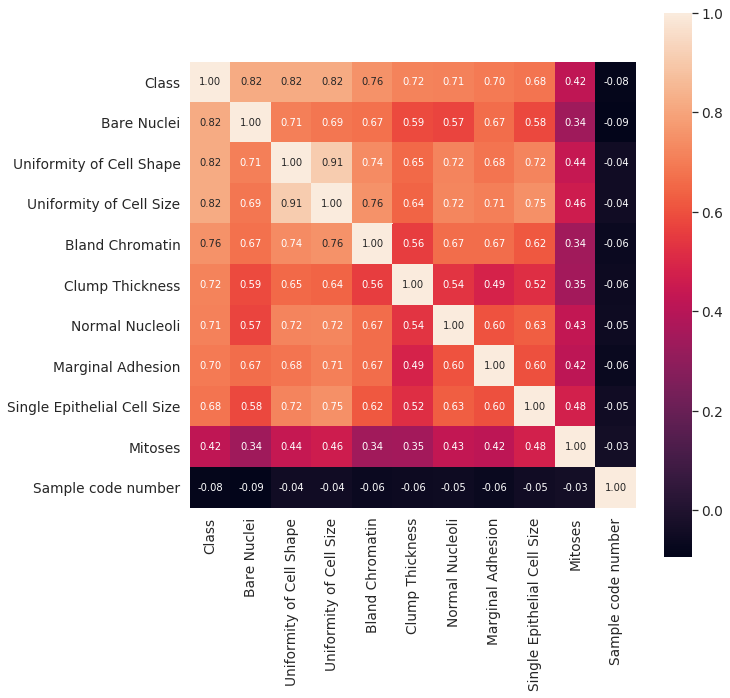

In [705]:
# Visualising Correlation

corrmat = data.corr()
k = 20
selectedCols = corrmat.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(data[selectedCols].values.T)
f, ax = plt.subplots(figsize=(10, 10))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 10}, yticklabels=selectedCols.values, xticklabels=selectedCols.values)
plt.show()

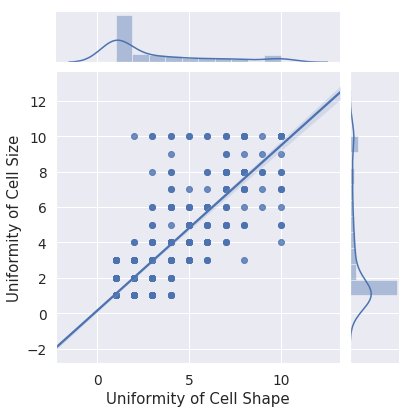

In [706]:
sns.jointplot("Uniformity of Cell Shape", "Uniformity of Cell Size", data=data, kind="reg")
plt.show()

"Uniformity of Cell Shape" and "Uniformity of Cell Size" are following a linear trend.

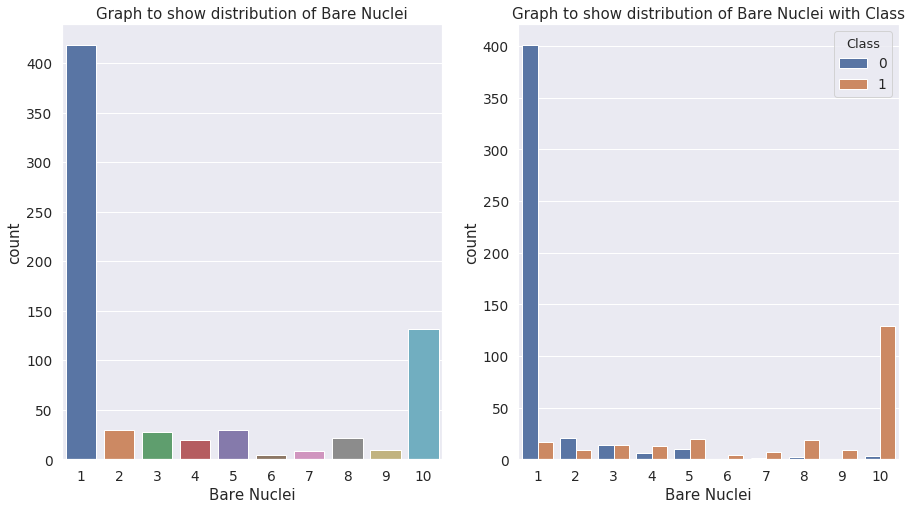

Class,0,1,percentage(1)
Bare Nuclei,,,
1,401,17,4.066986
2,21,9,30.000000
3,14,14,50.000000
4,6,13,68.421053
5,10,20,66.666667
6,0,4,100.000000
7,1,7,87.500000
8,2,19,90.476190
9,0,9,100.000000


In [707]:
df11 = createCountplotComb('Bare Nuclei', 'Class', data)
df11

Rows having Bare nuclei value 1 are having 96% chance of being benign(0) while rows having Bare Nuclei value 10 are

96% of rows having Bare nuclei value 1 are of benign(0) class.

97% of rows having Bare nuclei value 10 are of maligant(1) class.

Bare Nuclei will be a very important feature for classification.

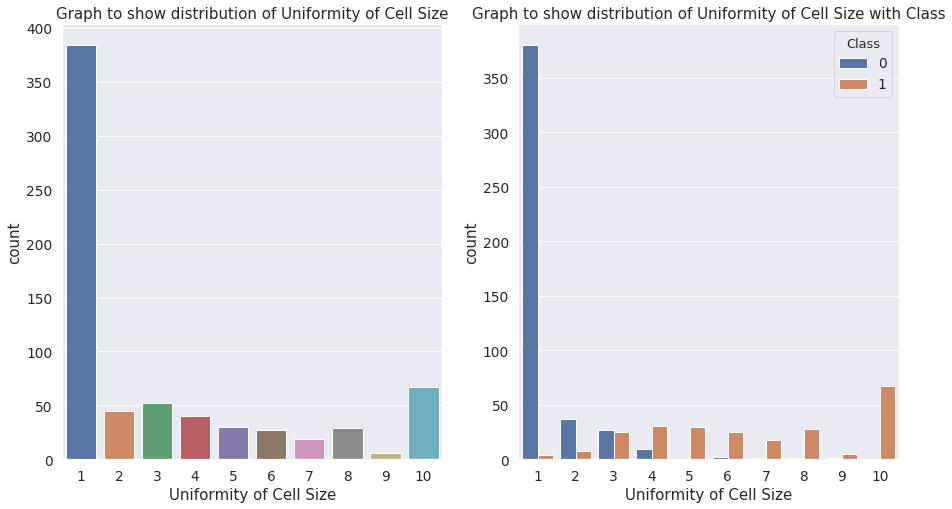

Class,0,1,percentage(1)
Uniformity of Cell Size,,,
1,380,4,1.041667
2,37,8,17.777778
3,27,25,48.076923
4,9,31,77.500000
5,0,30,100.000000
6,2,25,92.592593
7,1,18,94.736842
8,1,28,96.551724
9,1,5,83.333333


In [708]:
df11 = createCountplotComb('Uniformity of Cell Size', 'Class', data)
df11

In [709]:
data['Uniformity of Cell Size'].value_counts(normalize=True)

1     0.549356
10    0.095851
3     0.074392
2     0.064378
4     0.057225
5     0.042918
8     0.041488
6     0.038627
7     0.027182
9     0.008584
Name: Uniformity of Cell Size, dtype: float64

99% of rows having Uniformity cell size value 1 are of benign(0) class, and 54% of data is having this value. Another import feature for classification.

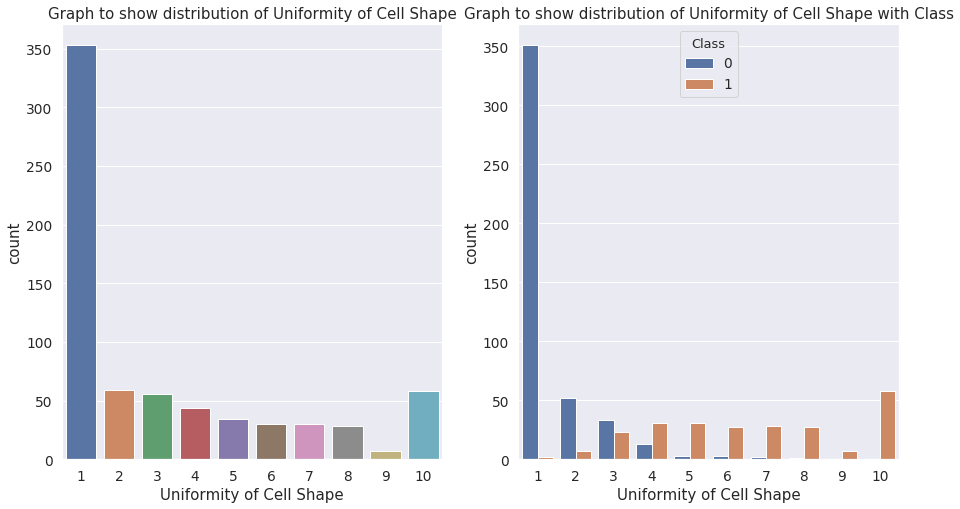

Class,0,1,percentage(1)
Uniformity of Cell Shape,,,
1,351,2,0.566572
2,52,7,11.864407
3,33,23,41.071429
4,13,31,70.454545
5,3,31,91.176471
6,3,27,90.000000
7,2,28,93.333333
8,1,27,96.428571
9,0,7,100.000000


In [710]:
df11 = createCountplotComb('Uniformity of Cell Shape', 'Class', data)
df11

In [711]:
data['Uniformity of Cell Shape'].value_counts(normalize=True)

1     0.505007
2     0.084406
10    0.082976
3     0.080114
4     0.062947
5     0.048641
7     0.042918
6     0.042918
8     0.040057
9     0.010014
Name: Uniformity of Cell Shape, dtype: float64

99.5% of rows having Uniformity cell shape value 1 are of benign(0) class, and 50% of data is having this value. Another import feature for classification.

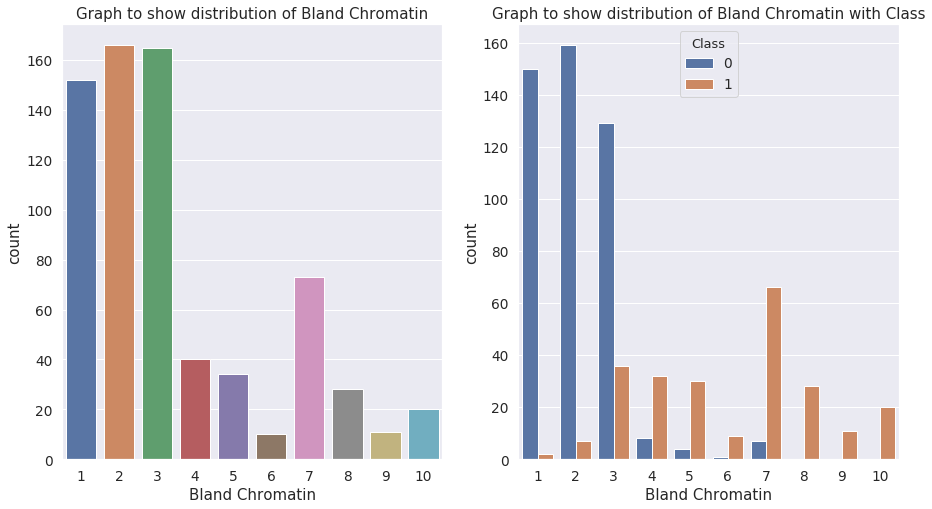

Class,0,1,percentage(1)
Bland Chromatin,,,
1,150,2,1.315789
2,159,7,4.216867
3,129,36,21.818182
4,8,32,80.000000
5,4,30,88.235294
6,1,9,90.000000
7,7,66,90.410959
8,0,28,100.000000
9,0,11,100.000000


In [712]:
df11 = createCountplotComb('Bland Chromatin', 'Class', data)
df11

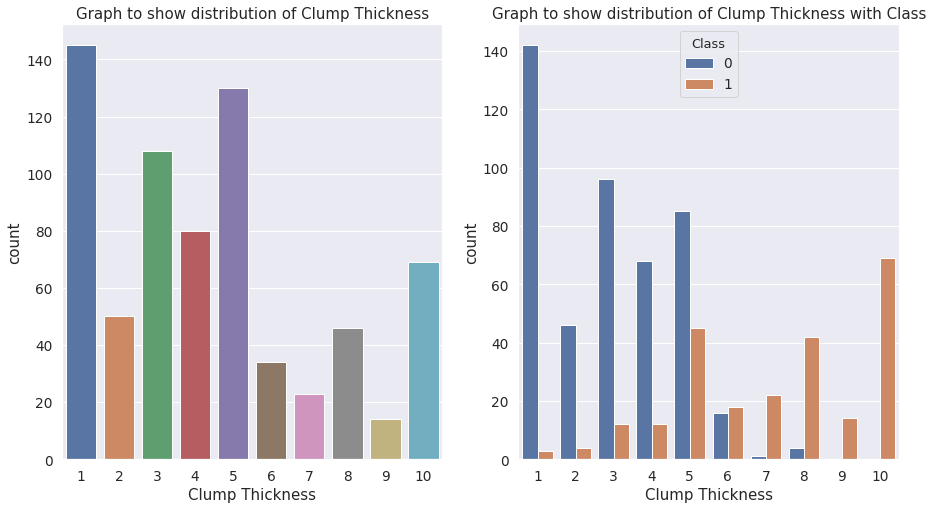

Class,0,1,percentage(1)
Clump Thickness,,,
1,142,3,2.068966
2,46,4,8.000000
3,96,12,11.111111
4,68,12,15.000000
5,85,45,34.615385
6,16,18,52.941176
7,1,22,95.652174
8,4,42,91.304348
9,0,14,100.000000


In [713]:
df11 = createCountplotComb('Clump Thickness', 'Class', data)
df11

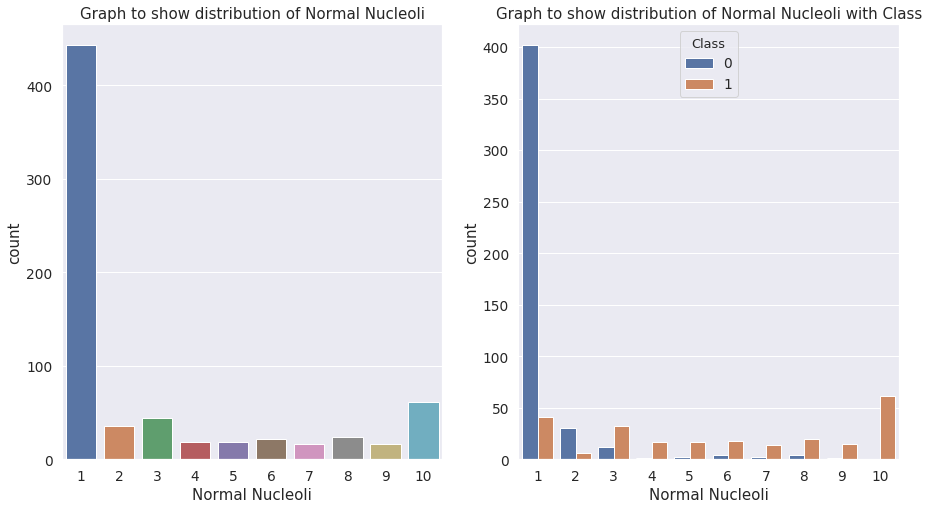

Class,0,1,percentage(1)
Normal Nucleoli,,,
1,402,41,9.255079
2,30,6,16.666667
3,12,32,72.727273
4,1,17,94.444444
5,2,17,89.473684
6,4,18,81.818182
7,2,14,87.500000
8,4,20,83.333333
9,1,15,93.750000


In [714]:
df11 = createCountplotComb('Normal Nucleoli', 'Class', data)
df11

In [715]:
data['Normal Nucleoli'].value_counts(normalize=True)

1     0.633763
10    0.087268
3     0.062947
2     0.051502
8     0.034335
6     0.031474
5     0.027182
4     0.025751
9     0.022890
7     0.022890
Name: Normal Nucleoli, dtype: float64

90% of rows having Normal Nucleoli value 1 are of benign(0) class, and 63% of data is having this value. Another import feature for classification.

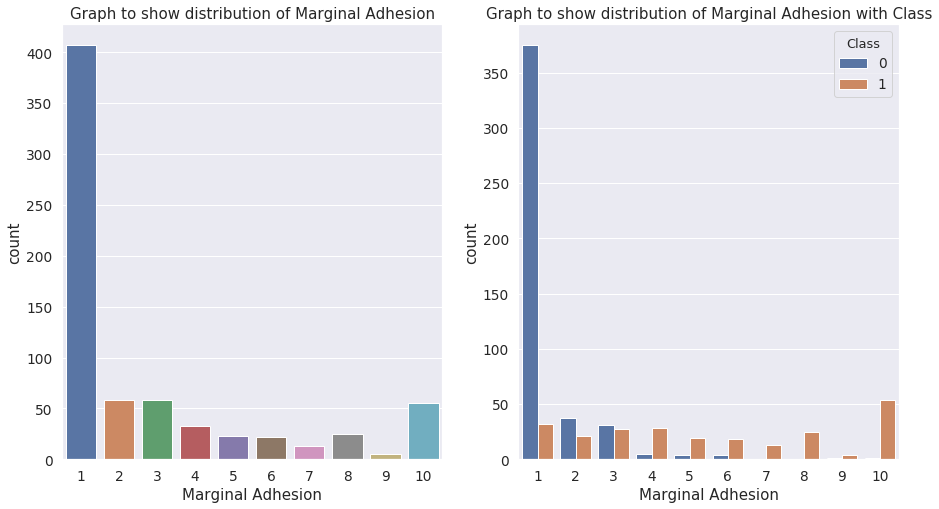

Class,0,1,percentage(1)
Marginal Adhesion,,,
1,375,32,7.862408
2,37,21,36.206897
3,31,27,46.551724
4,5,28,84.848485
5,4,19,82.608696
6,4,18,81.818182
7,0,13,100.000000
8,0,25,100.000000
9,1,4,80.000000


In [716]:
df11 = createCountplotComb('Marginal Adhesion', 'Class', data)
df11

In [717]:
data['Marginal Adhesion'].value_counts(normalize=True)

1     0.582260
3     0.082976
2     0.082976
10    0.078684
4     0.047210
8     0.035765
5     0.032904
6     0.031474
7     0.018598
9     0.007153
Name: Marginal Adhesion, dtype: float64

93% of rows having Marginal Adhesion value 1 are of benign(0) class, and 58% of data is having this value. Also, 98% of rows having Marginal Adhesion value 10 are of maligant(1) class. Another import feature for classification.

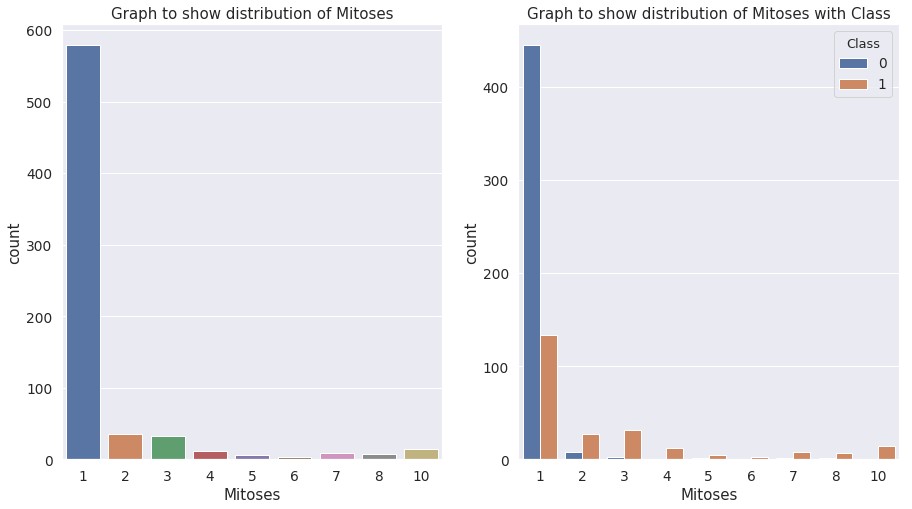

Class,0,1,percentage(1)
Mitoses,,,
1,445,134,23.143351
2,8,27,77.142857
3,2,31,93.939394
4,0,12,100.000000
5,1,5,83.333333
6,0,3,100.000000
7,1,8,88.888889
8,1,7,87.500000
10,0,14,100.000000


In [718]:
df11 = createCountplotComb('Mitoses', 'Class', data)
df11

In [719]:
data['Mitoses'].value_counts(normalize=True)

1     0.828326
2     0.050072
3     0.047210
10    0.020029
4     0.017167
7     0.012876
8     0.011445
5     0.008584
6     0.004292
Name: Mitoses, dtype: float64

Unlike other features presence of value in this feature are showing presence of maligant(1) class, and for some values all of data having these values are tested to be of maligant(1) class. Can be a very impprtant feature for classification.

# Feature Selection

Since top 3 correlated features with Class, were itself very hghly correlated to each other. So I thought of doing Principal Component Analysis to do dimensionality reduction.


 Feature Names: 

 [0 1 2 3] 


Feature Correlation:



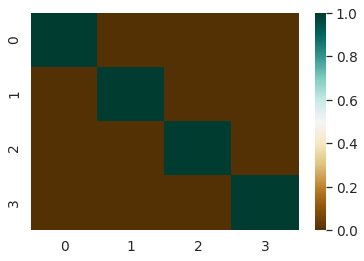

In [720]:
Xscaled = pd.DataFrame(scale(X),columns = X.columns, index=X.index) 
variancePct = 4
pca = PCA(n_components=variancePct)
X_transformed = pca.fit_transform(Xscaled, y)
Xpca = pd.DataFrame(X_transformed, index=Xscaled.index)
pcaDf = Xpca.copy()
pcaDf['Class'] = y
pcaFeats = pd.DataFrame(pca.components_,columns=Xscaled.columns,index = ['PC-0', 'PC-1', 'PC-2', 'PC-3'])
print('\n Feature Names: \n\n', Xpca.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(Xpca.corr(),cmap="BrBG",annot=False)

In [721]:
pcaFeats

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
PC-0,0.302805,0.381190,0.377574,0.332823,0.336391,0.333497,0.345956,0.335840,0.229818
PC-1,-0.146029,-0.049564,-0.085270,-0.044719,0.164038,-0.247710,-0.229942,0.025027,0.908394
PC-2,-0.862217,0.019092,-0.034584,0.421448,0.110104,-0.003671,0.197449,0.131650,-0.094593
PC-3,-0.088217,0.202639,0.175155,-0.470317,0.373329,-0.543177,-0.006990,0.455372,-0.239686


# Visualization

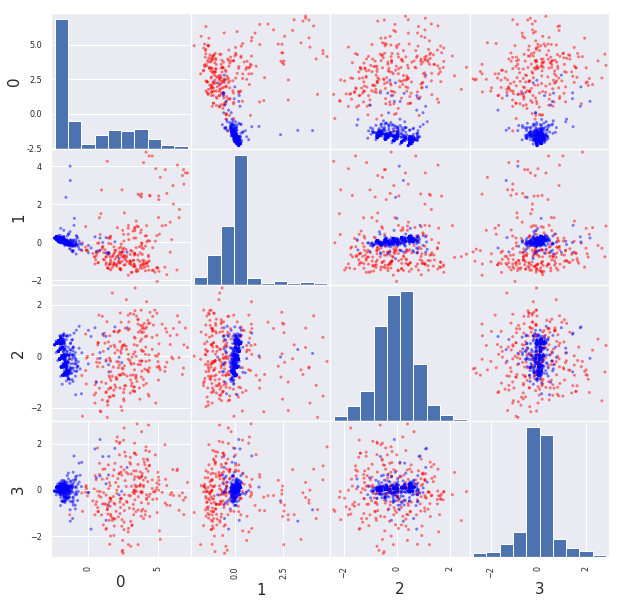

In [722]:
colorFunction = {0: "blue", 1: "red"}
colors = pcaDf["Class"].map(lambda x: colorFunction.get(x))
pd.plotting.scatter_matrix(Xpca, c=colors, alpha = 0.5, figsize = (10, 10), grid=True);

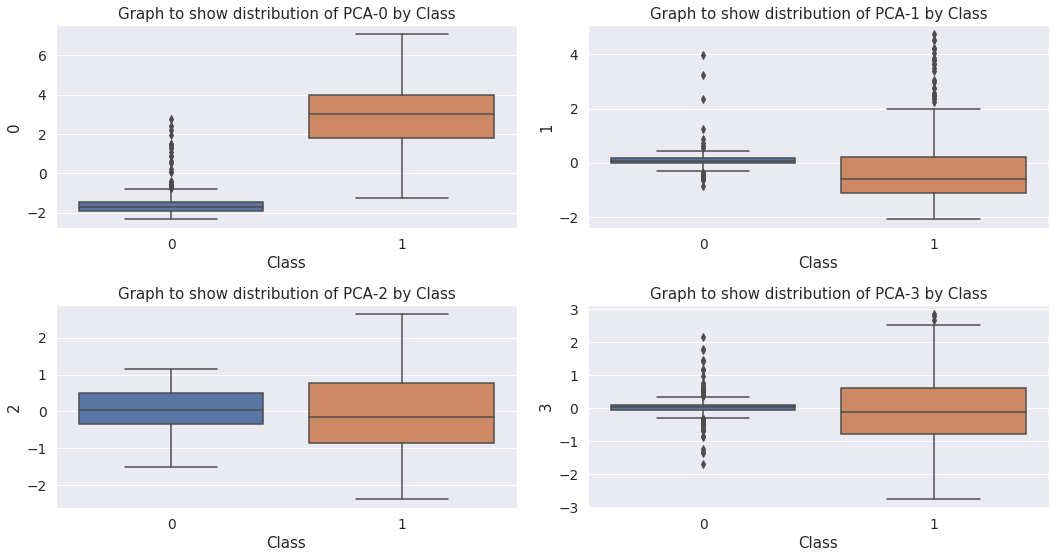

In [723]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x='Class', y=0, data=pcaDf)
t = 'Graph to show distribution of PCA-0 by Class'
plt.title(t)

plt.subplot(2,2,2)
sns.boxplot(x='Class', y=1, data=pcaDf)
t = 'Graph to show distribution of PCA-1 by Class'
plt.title(t)

plt.subplot(2,2,3)
sns.boxplot(x='Class', y=2, data=pcaDf)
t = 'Graph to show distribution of PCA-2 by Class'
plt.title(t)

plt.subplot(2,2,4)
sns.boxplot(x='Class', y=3, data=pcaDf)
t = 'Graph to show distribution of PCA-3 by Class'
plt.title(t)
plt.tight_layout()

# Data Shuffling

In [724]:
pcaDf = shuffle(pcaDf, random_state=43)

Dataset is shuffled well to avoid any element of bias/patterns in the split datasets before training the ML model.

# Data Splitting

In [725]:
Xpca = pcaDf.loc[:, pcaDf.columns != 'Class']
y = pcaDf['Class']
x_train1, x_test1, y_train1, y_test1 = train_test_split(Xpca, y, test_size=0.2, random_state=42)

# Modelling

In [726]:
def plotConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [727]:
def pred2DF(pred, y_test):
    prediction = pd.Series(pred)
    prediction.index = y_test.index
    df = pd.DataFrame({'Op': y_test, 'Prediction': prediction}, index=y_test.index)
    df = df.join(sampleCodes, how='inner')
    return df

In [728]:
def calcAccuracy(op, pred):
    return (op == pred).sum()/pred.shape[0]

def calcError(op, pred):
    return (op != pred).sum()/pred.shape[0]

In [729]:
def makePredict(model, mName, x_train, y_train, x_test, y_test):
    trDf = crossValidate(model, x_train,  y_train, n=5)
    model.fit(x_train, y_train)
    trPredict = trDf['Pred'].astype(int).ravel()
    y_train = trDf['Op'].astype(int).ravel()
    tePredict = model.predict(x_test)
    tePredict = tePredict.ravel()
    df = pred2DF(tePredict, y_test)
    
    prec, rec, f1score, sup = precision_recall_fscore_support(y_test, tePredict, average='binary')
    acc = calcAccuracy(y_test, tePredict)
    err = calcError(y_test, tePredict)
    prec = round(prec, 2)
    rec = round(rec, 2)
    f1score = round(f1score, 2)
    acc = round(acc, 2)
    err = round(err, 2)
    
    precTr, recTr, f1scoreTr, supTr = precision_recall_fscore_support(y_train, trPredict, average='binary')
    accTr = calcAccuracy(y_train, trPredict)
    errTr = calcError(y_train, trPredict)
    precTr = round(precTr, 2)
    recTr = round(recTr, 2)
    f1scoreTr = round(f1scoreTr, 2)
    accTr = round(accTr, 2)
    errTr = round(errTr, 2)
    
    print(mName, (9 - len(mName)) * ' ', '\t\tTest\t\tTrain(K-Fold)')
    print()
    print("Accuracy \t\t", acc, '\t\t', accTr)
    print("Error    \t\t", err, '\t\t', errTr)
    print("Recall   \t\t", rec, '\t\t', recTr)
    print("Precision\t\t", prec,'\t\t', precTr)
    print("F1 Score \t\t", f1score, '\t\t', f1scoreTr)
    print()
    print("Classification Report of ", mName, " on test : ")
    cm = confusion_matrix(y_test, tePredict, labels=[0, 1])
    cm1 = confusion_matrix(y_train, trPredict, labels=[0, 1])
    plt.figure(figsize=(16,8))
    
    plt.subplot(1,2, 1)
    plotConfusionMatrix(cm, classes=['Benign(0)', 'Maligant(1)'],title='Test Confusion matrix')
    
    plt.subplot(1,2, 2)
    plotConfusionMatrix(cm1, classes=['Benign(0)', 'Maligant(1)'],title='Train Confusion matrix')
    
    plt.tight_layout()
    plt.show()
    return df, tePredict

In [730]:
def plotDecisionTree(decTree,feats):
    dot_data = tree.export_graphviz(decTree, out_file=None, 
                             feature_names=feats,  
                             class_names=['Benign', 'Malignant'],  
                             filled=True, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph

In [731]:
def crossValidate(clf, X, y, n=3):
    kf = KFold(n_splits=n)
    df = pd.DataFrame(columns=['Pred', 'Op'])
    y = y.reset_index(drop=True)
    X = X.reset_index(drop=True)
    for trInd, teInd in kf.split(X):
        X_tr, X_te = X.iloc[trInd,:], X.iloc[teInd,:]
        y_tr, y_te = y.iloc[trInd], y.iloc[teInd]
        clf.fit(X_tr, y_tr)
        pred = pd.Series(clf.predict(X_te), index=teInd, name='Pred')
        y_te = pd.Series(y_te, index=teInd, name='Op')
        tempDf = pd.concat([pred, y_te], axis=1)
        df = df.append(tempDf)
    return df        

In [732]:
def plotFeatureImportances(clf, feats):
    lenFeats = len(feats)
    plt.barh(range(lenFeats), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(lenFeats), feats)

In [733]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)

Decision Tree  		Test		Train(K-Fold)

Accuracy 		 0.96 		 0.97
Error    		 0.04 		 0.03
Recall   		 0.96 		 0.99
Precision		 0.92 		 0.94
F1 Score 		 0.94 		 0.96

Classification Report of  Decision Tree  on test : 


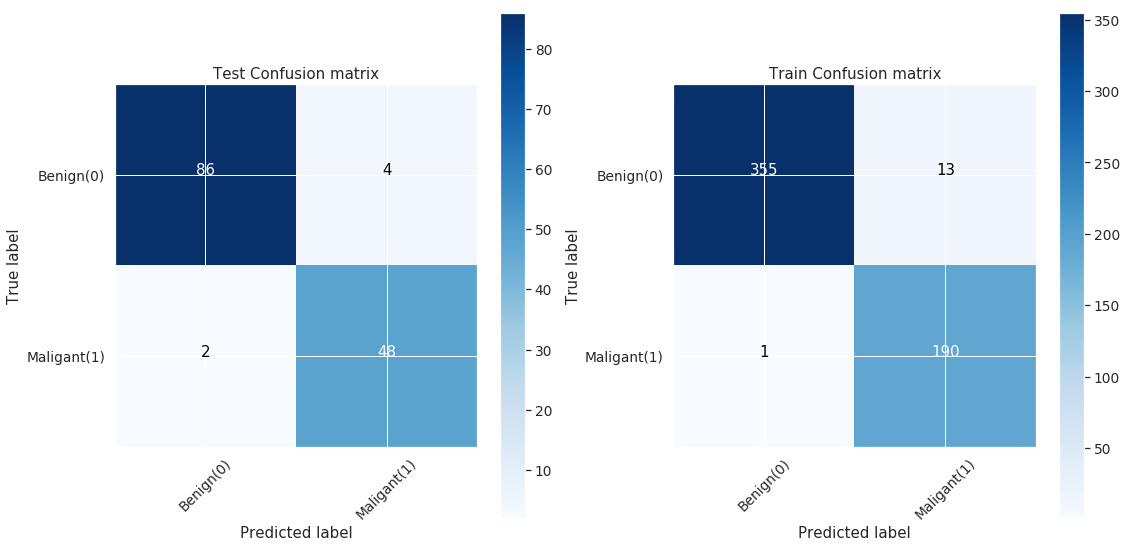

In [734]:
dtreeDf, pred = makePredict(clf, 'Decision Tree', x_train1, y_train1, x_test1, y_test1)

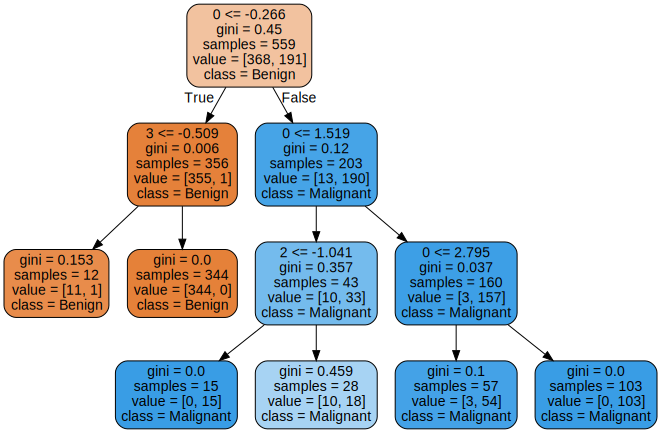

In [735]:
featureNames = x_train1.columns.values

plotDecisionTree(clf,featureNames)

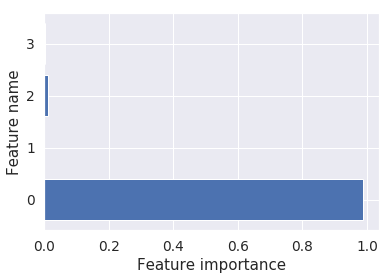

In [736]:
plotFeatureImportances(clf, featureNames)

# Result

My classifier classified test data with Recall of 0.96 and F1 Score of 0.94.

1(a). Number of false positive in test data : 4.

1(b). Number of false positive in Train data(K-fold) : 13

2(a). Number of false negative in test data : 2

2(b). Number of false negative in Train data(K-fold) : 1